# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.float_format', '{:.2f}'.format)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [3]:
# Считаем количество данных в датафрейме 
data.shape[0]

23699

**Значения NaN в датафрейме были обнаружены в следующих столбцах:**

- ceiling_height
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name
- airports_nearest
- cityCenters_nearest
- parks_around3000
- ponds_nearest
- days_exposition


### Предобработка данных

In [4]:
# Проверка на пропущенные значения в датафрейме
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

**В датафрейме есть пропущенные значения в следующих столбцах с данными:**

- `ceiling_height           9195`
- `floors_total               86`
- `living_area              1903`
- `is_apartment            20924`
- `kitchen_area             2278`
- `balcony                 11519`
- `locality_name              49`
- `airports_nearest         5542`
- `cityCenters_nearest      5519`
- `parks_around3000         5518`
- `parks_nearest           15620`
- `ponds_around3000         5518`
- `ponds_nearest           14589`
- `days_exposition          3181`

**Причины пропущенных значений могут разные факторы, такие как:**
- Необязательные поля. Пользователи могли не указать информацию определнного поля, т.к. являлось необязательным для заполнения
- Технические ошибки. Проблемы при передаче данных из БД, программных сбоев или ошибок при сохранении инфомации, могли привести к пропущенным значениям в данных
- Неявные пропуски.


In [5]:
# Заменяем пропущенные значения на 0 в следующих столбцах:
columns_to_fillna = ['is_apartment', 'parks_nearest', 'ponds_nearest', 'balcony',\
                     'airports_nearest', 'ponds_around3000', 'parks_around3000',\
                     'cityCenters_nearest']

for column in columns_to_fillna:
    data[column] = data[column].fillna(0).astype(int)

In [6]:
# Выводим медианное значение столбца ceiling_height 
ceiling_height_median = data['ceiling_height'].median()
ceiling_height_median

2.65

In [7]:
# Меняем пропущенные значения в столбце ceiling_height на 0, не меняя тип данных столбца
data['ceiling_height'].fillna(ceiling_height_median, inplace=True)    

In [8]:
# Выводим медианное значение столбца living_area
living_area_median = data['living_area'].median()
living_area_median

30.0

In [9]:
# Выводим медианное значение столбца kitchen_area
kitchen_area_median = data['kitchen_area'].median()
kitchen_area_median

9.1

In [10]:
# Просматриваем сводную статистическую информацию следующих столбцов
kitchen_area_min = data['kitchen_area'].min()
print('Минимальное значение столбца kitchen_area: ', kitchen_area_min)

kitchen_area = data.query('kitchen_area == @kitchen_area_min') 
print("Количетсво кухон с квадратурой равной минимальной: ", kitchen_area['kitchen_area'].count())

Минимальное значение столбца kitchen_area:  1.3
Количетсво кухон с квадратурой равной минимальной:  1


In [11]:
# Выбираем минимальным значением столбца kitchen_area как 2
data = data.query('kitchen_area >= 2')

In [12]:
# Заменяем пропущенные значения на 2 в следующих столбцах:
data['living_area'].fillna(living_area_median, inplace=True)    
data['kitchen_area'].fillna(kitchen_area_median, inplace=True)

**Объяснение:**
Пустые значения в столбцах `living_area` и `kitchen_area` были изменены на их же медианные значения

In [13]:
# Выводим медианное значение столбца days_exposition
days_exposition_median = data['days_exposition'].median()
days_exposition_median

102.0

In [14]:
data['days_exposition'].fillna(days_exposition_median, inplace=True)

In [15]:
data.nunique()

total_images              38
last_price              2692
total_area              2019
first_day_exposition    1479
rooms                     16
ceiling_height           176
floors_total              35
living_area             1720
floor                     33
is_apartment               2
studio                     1
open_plan                  1
kitchen_area             970
balcony                    6
locality_name            346
airports_nearest        7909
cityCenters_nearest     7330
parks_around3000           4
parks_nearest            983
ponds_around3000           4
ponds_nearest           1090
days_exposition         1126
dtype: int64

In [16]:
data = data.rename(columns={"cityCenters_nearest": "city_centers_nearest", "parks_around3000": "parks_around_3_km",\
                           "ponds_around3000": "ponds_around_3_km", "ponds_nearest": "ponds_nearest_m",\
                           "parks_nearest": "parks_nearest_m"})

data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')\
                        .str.replace('деревня ', '').str.replace('городской посёлок ', '')\
                        .str.replace('поселок ', '').str.replace('городского типа ', '')\
                        .str.replace('городской ', '').str.replace('село ', '')\
                        .str.replace('садоводческое некоммерческое товарищество ', '')\
                        .str.replace('садоводческое товарищество ', '')\
                        .str.replace('садовое товарищество ', '').str.replace('имени ', '')\
                        .str.replace('при железнодорожной станции ', '')\
                        .str.replace('станции ', '').str.replace('коттеджный ', '')
                        
data = data.dropna(subset=['locality_name', 'floors_total'])

data = data.astype({'floors_total': int})

In [17]:
data.nunique()

total_images              38
last_price              2660
total_area              2013
first_day_exposition    1477
rooms                     16
ceiling_height           176
floors_total              35
living_area             1710
floor                     33
is_apartment               2
studio                     1
open_plan                  1
kitchen_area             962
balcony                    6
locality_name            287
airports_nearest        7887
city_centers_nearest    7312
parks_around_3_km          4
parks_nearest_m          981
ponds_around_3_km          4
ponds_nearest_m         1089
days_exposition         1126
dtype: int64

In [18]:
# Проверяем на пропущенные значения
data.isna().sum().sort_values()

total_images            0
ponds_around_3_km       0
parks_nearest_m         0
parks_around_3_km       0
city_centers_nearest    0
airports_nearest        0
locality_name           0
balcony                 0
kitchen_area            0
open_plan               0
studio                  0
is_apartment            0
floor                   0
living_area             0
floors_total            0
ceiling_height          0
rooms                   0
first_day_exposition    0
total_area              0
last_price              0
ponds_nearest_m         0
days_exposition         0
dtype: int64




**Описание**
1. Строки датафрейма содеражение пустое значение в столбце "locality_name" были удалены из датафрейма
2. Значения NaN были изменены на 0
3. Наименование следующих столбцов были изменены:
- `cityCenters_nearest` на `city_centers_nearest`;
- `parks_around3000` на `parks_around_3_km`;
- `ponds_around3000` на `ponds_around_3_km`;
- `ponds_nearest` на `ponds_nearest_m`;
- `parks_nearest` на `parks_nearest_m`.
4. Типы данных следующих столбцов были изменены на `int`:
- `balcony`
- `floors_total`
- `days_exposition`
- `airports_nearest`
- `city_centers_nearest`
- `parks_around_3_km`
- `parks_nearest`
- `ponds_around_3_km`
- `ponds_nearest_m`
5. Изменение типа данных определенных столбцов, как указано в пункте 4 были по причине, что в этих столбцах содержатся данные которые обозначают расстояние в метрах или километрах, или же количественные (например, балконы квартир)


### Посчитайте и добавьте в таблицу новые столбцы

In [19]:
data[['first_exposition_day', 'first_time_exposition']] = data['first_day_exposition'].str.extract(r'(\d{4}-\d{2}-\d{2})T(\d{2}:\d{2}:\d{2})')
data.drop('first_day_exposition', axis=1, inplace=True)

# Добавляем цену за 1 кв. метр, округля цену после точки до 3 цифр
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 3)

# Считаем и добавляем в таблицу день пубилкации объявления (0 - понедельник, 1 - вторник и т.д.)
data['first_exposition_day'] = pd.to_datetime(data['first_exposition_day'])
data['day_of_week'] = data['first_exposition_day'].dt.dayofweek
# Считаем и добавляем в таблицу месяц пубилкации объявления
data['month_of_exposition'] = data['first_exposition_day'].dt.month
# Считаем и добавляем в таблицу год пубилкации объявления
data['year_of_exposition'] = data['first_exposition_day'].dt.year

# Считаем и добавляем в табилцу тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

data.head(10)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around_3_km,ponds_nearest_m,days_exposition,first_exposition_day,first_time_exposition,price_per_sqm,day_of_week,month_of_exposition,year_of_exposition,floor_type
0,20,13000000.00,108.00,3,2.70,16,51.00,8,0,False,...,2,755,102.00,2019-03-07,00:00:00,120370.37,3,3,2019,другой
1,7,3350000.00,40.40,1,2.65,11,18.60,1,0,False,...,0,0,81.00,2018-12-04,00:00:00,82920.79,1,12,2018,первый
2,10,5196000.00,56.00,2,2.65,5,34.30,4,0,False,...,2,574,558.00,2015-08-20,00:00:00,92785.71,3,8,2015,другой
4,2,10000000.00,100.00,2,3.03,14,32.00,13,0,False,...,1,48,121.00,2018-06-19,00:00:00,100000.00,1,6,2018,другой
5,10,2890000.00,30.40,1,2.65,12,14.40,5,0,False,...,0,0,55.00,2018-09-10,00:00:00,95065.79,0,9,2018,другой
6,6,3700000.00,37.30,1,2.65,26,10.60,6,0,False,...,0,0,155.00,2017-11-02,00:00:00,99195.71,3,11,2017,другой
7,5,7915000.00,71.60,2,2.65,24,30.00,22,0,False,...,0,0,102.00,2019-04-18,00:00:00,110544.69,3,4,2019,другой
8,20,2900000.00,33.16,1,2.65,27,15.43,26,0,False,...,0,0,189.00,2018-05-23,00:00:00,87454.76,2,5,2018,другой
9,18,5400000.00,61.00,3,2.50,9,43.60,7,0,False,...,0,0,289.00,2017-02-26,00:00:00,88524.59,6,2,2017,другой
10,5,5050000.00,39.60,1,2.67,12,20.30,3,0,False,...,2,553,137.00,2017-11-16,00:00:00,127525.25,3,11,2017,другой


**Описание**
1. В датафрейм добавлены такие столбцы как `first_exposition_day` и `first_time_exposition`, где `first_exposition_day` хранятся данные о дате публикации и `first_time_exposition` который хранит данные о времени публикации
2. В датафрейм добавлены следующие столбцы:
- `price_per_sqm` - цена квартиры за кв. метр;
- `day_of_week` - день публикации недели;
- `month_of_exposition` - месяц публикации;
- `year_of_exposition` - год публикации;
- `floor_type` - тип этажа квартиры.



### Проведите исследовательский анализ данных

In [20]:
# Выводим информация столбца ceiling_height 
data['ceiling_height'].describe()

count   21342.00
mean        2.72
std         0.99
min         1.00
25%         2.60
50%         2.65
75%         2.70
max       100.00
Name: ceiling_height, dtype: float64

In [21]:
# Выводим значение третьего квартиля столбца ceiling_height 
ceiling_height_q3 = data['ceiling_height'].quantile(0.75)

for idx, row in data.iterrows():
    if row['ceiling_height'] > ceiling_height_q3:
        data.at[idx, 'ceiling_height'] /= 10

In [22]:
data['ceiling_height'].describe()

count   21342.00
mean        2.08
std         0.97
min         0.27
25%         2.50
50%         2.60
75%         2.65
max        10.00
Name: ceiling_height, dtype: float64

In [23]:
1 - data.shape[0]/24000

0.11075000000000002

In [24]:
1 - data.shape[0]/23699

0.09945567323515758

In [25]:
display(data['total_area'].describe())

count   21342.00
mean       60.71
std        35.02
min        14.00
25%        40.56
50%        52.39
75%        70.00
max       900.00
Name: total_area, dtype: float64

In [26]:
display(data['rooms'].describe())

count   21342.00
mean        2.10
std         1.06
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [27]:
display(data['balcony'].describe())

count   21342.00
mean        0.63
std         0.98
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         5.00
Name: balcony, dtype: float64

<AxesSubplot:>

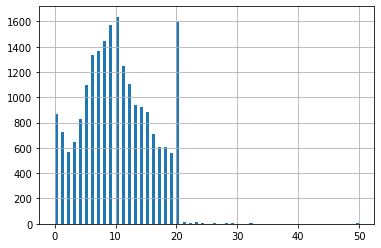

In [28]:
data['total_images'].hist(bins=100)

<AxesSubplot:>

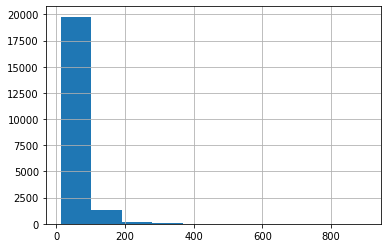

In [29]:
data['total_area'].hist()

<AxesSubplot:>

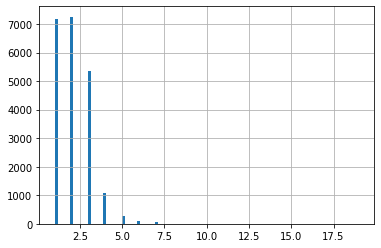

In [30]:
data['rooms'].hist(bins=100)

<AxesSubplot:>

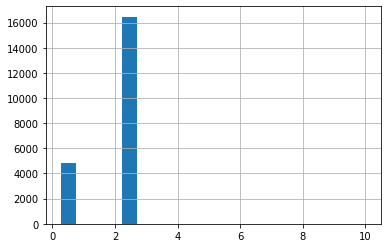

In [31]:
data['ceiling_height'].hist(bins=20)

<AxesSubplot:>

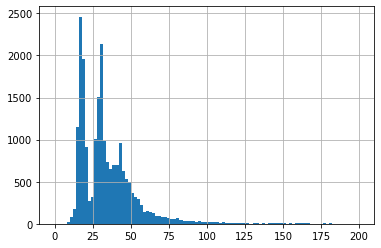

In [32]:
data['living_area'].hist(bins=100, range=(0, 200))

<AxesSubplot:>

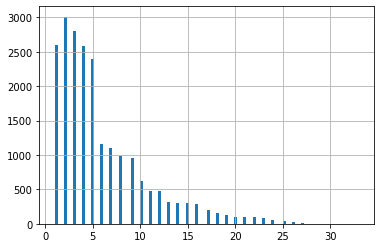

In [33]:
data['floor'].hist(bins=100)

count   21342.00
mean       10.59
std         6.53
min         1.00
25%         5.00
50%         9.00
75%        15.00
max        60.00
Name: floors_total, dtype: float64

Топовые значения:  5


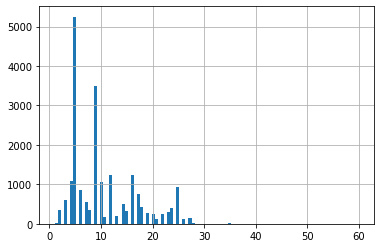

In [34]:
data['floors_total'].hist(bins=100)
display(data['floors_total'].describe())

top_total_floors = data['floors_total'].value_counts().idxmax()
print('Топовые значения: ', top_total_floors)

count   21342.00
mean       10.56
std         5.90
min         2.00
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

<AxesSubplot:>

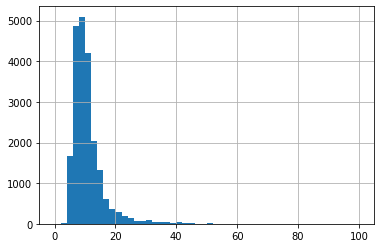

In [35]:
display(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=50, range=(0, 100))

<AxesSubplot:>

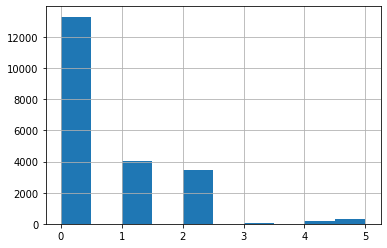

In [36]:
data['balcony'].hist(bins=10)

In [37]:
data['locality_name'].describe()

count               21342
unique                287
top       Санкт-Петербург
freq                14307
Name: locality_name, dtype: object

In [38]:
1 - data.shape[0]/23699

0.09945567323515758

**Вывод.**
По построенным выше графикам, можно сделать вывод, что чаще всего в столбцах встречаются следующие значения:
- `total_images` - 10 (фотографий);
- `total_area` - 100 (кв. м.);
- `rooms` - 2 (комнат)
- `ceiling_height` - больше 2 
- `living_area` - до 25
- `floor` - 2
- `floors_total` - 5
- `kitchen_area` - до 20
- `balcony` - 0
- `locality_name` - `Санкт-Петербург`

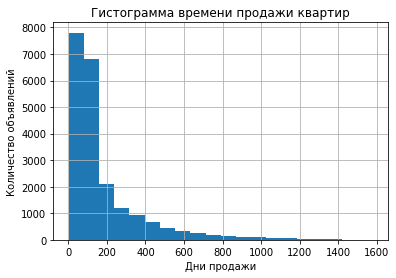

Вывод:
Среднее время продажи квартир: 173.81449723549807 дней
Медианное время продажи квартир: 102.0 дней


In [39]:
data['days_exposition'].hist(bins=20)
plt.xlabel('Дни продажи')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма времени продажи квартир')
plt.show()

mean_days = data['days_exposition'].mean()
median_days = data['days_exposition'].median()

print("Вывод:")
print(f"Среднее время продажи квартир: {mean_days} дней")
print(f"Медианное время продажи квартир: {median_days} дней")


**Вывод**

1. Среднее время продажи квартир составляет `173.8` дней
2. Медианное время продажи квартир составляет `102` дней

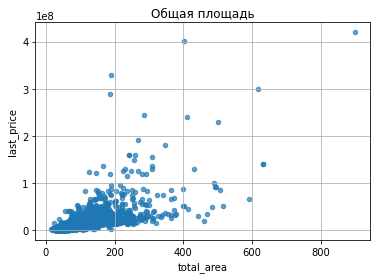

0.6973183822494969


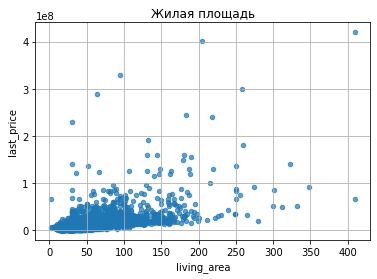

0.5875513733561022


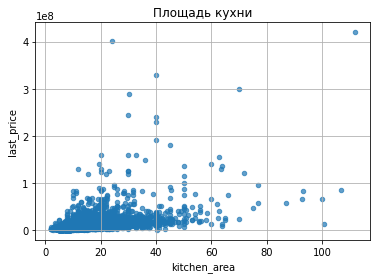

0.5203752059851694


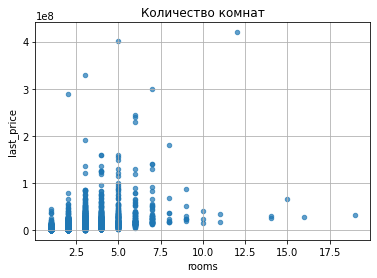

0.39102329260286617


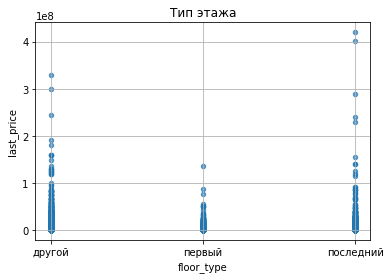

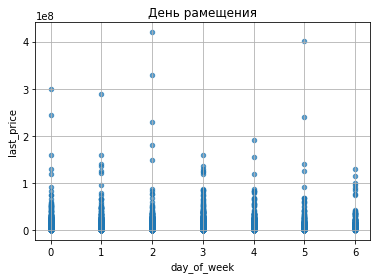

-0.00572021069700779


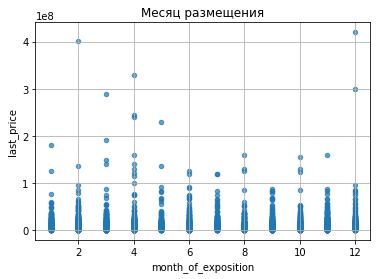

-0.0008105907573121281


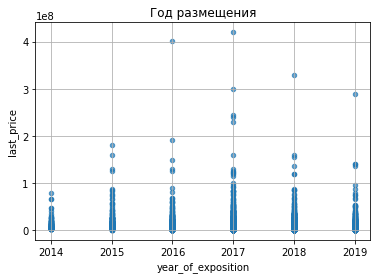

-0.04035449076442375


In [40]:
data['total_area'].corr(data['last_price'])
data.plot(x='total_area', y='last_price', kind='scatter', title='Общая площадь', grid=True, alpha=0.7)
plt.show()
print(data['total_area'].corr(data['last_price']))

data.plot(x='living_area', y='last_price', kind='scatter', title='Жилая площадь', grid=True, alpha=0.7)
plt.show()
print(data['living_area'].corr(data['last_price']))

data.plot(x='kitchen_area', y='last_price', kind='scatter', title='Площадь кухни', grid=True, alpha=0.7)
plt.show()
print(data['kitchen_area'].corr(data['last_price']))

data.plot(x='rooms', y='last_price', kind='scatter', title='Количество комнат', grid=True, alpha=0.7)
plt.show()
print(data['rooms'].corr(data['last_price']))

data.plot(x='floor_type', y='last_price', kind='scatter', title='Тип этажа', grid=True, alpha=0.7)
plt.show()
# print(data['floor_type'].corr(data['last_price']))

data.plot(x='day_of_week', y='last_price', kind='scatter', title='День рамещения', grid=True, alpha=0.7)
plt.show()
print(data['day_of_week'].corr(data['last_price']))

data.plot(x='month_of_exposition', y='last_price', kind='scatter', title='Месяц размещения', grid=True, alpha=0.7)
plt.show()
print(data['month_of_exposition'].corr(data['last_price']))

data.plot(x='year_of_exposition', y='last_price', kind='scatter', title='Год размещения', grid=True, alpha=0.7)
plt.show()
print(data['year_of_exposition'].corr(data['last_price']))



<AxesSubplot:title={'center':'Год размещения'}, xlabel='year_of_exposition'>

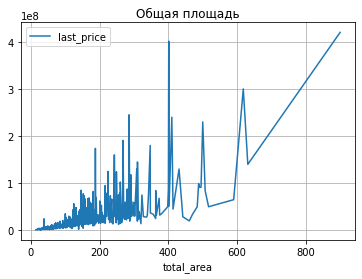

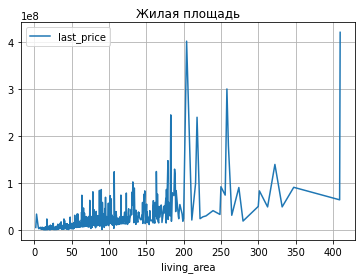

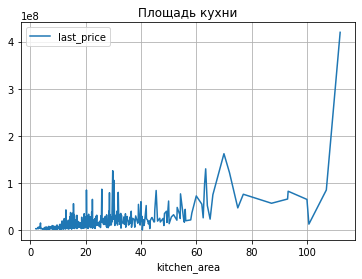

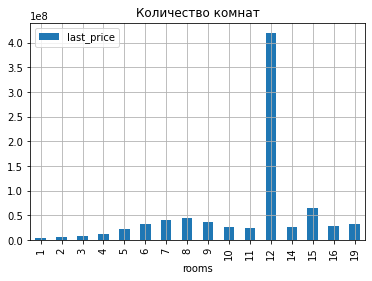

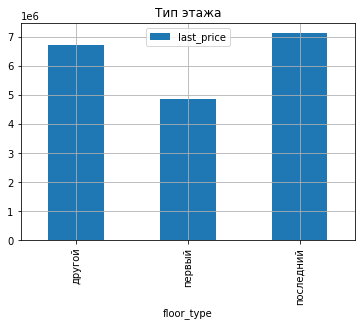

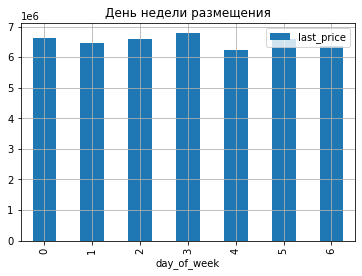

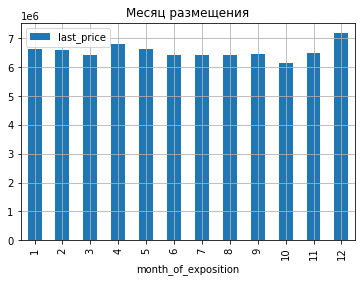

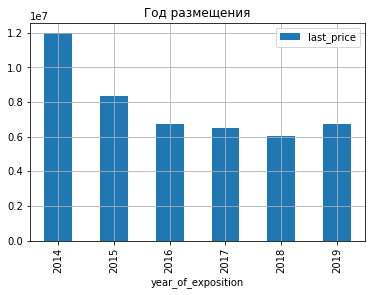

In [41]:
pivot_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='mean')
pivot_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='mean') 
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
pivot_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
pivot_day_of_week = data.pivot_table(index='day_of_week', values='last_price', aggfunc='mean')
pivot_month_of_exposition = data.pivot_table(index='month_of_exposition', values='last_price', aggfunc='mean')
pivot_year_of_exposition = data.pivot_table(index='year_of_exposition', values='last_price', aggfunc='mean')

pivot_total_area.plot(kind='line', title='Общая площадь', grid=True)
pivot_living_area.plot(kind='line', title='Жилая площадь', grid=True)
pivot_kitchen_area.plot(kind='line', title='Площадь кухни', grid=True)
pivot_rooms.plot(kind='bar', title='Количество комнат', grid=True)
pivot_floor_type.plot(kind='bar', title='Тип этажа', grid=True)
pivot_day_of_week.plot(kind='bar', title='День недели размещения', grid=True)
pivot_month_of_exposition.plot(kind='bar', title='Месяц размещения', grid=True)
pivot_year_of_exposition.plot(kind='bar', title='Год размещения', grid=True)


**Вывод**

На общую цену квартиры больше всего влияет:
1. Общая площадь квартиры
2. Количество комнат

In [42]:
locality_counts = data['locality_name'].value_counts()

top_10_localities = locality_counts.head(10)

avg_price_per_sqm = data[data['locality_name'].isin(top_10_localities.index)]
avg_price_per_sqm = avg_price_per_sqm.groupby('locality_name')[['last_price', 'total_area']].mean()
avg_price_per_sqm['price_per_sqm'] = round(avg_price_per_sqm['last_price'] / avg_price_per_sqm['total_area'], 3)

highest_price_loc_name = avg_price_per_sqm['price_per_sqm'].idxmax()
lowest_price_loc_name =  avg_price_per_sqm['price_per_sqm'].idxmin()

highest_price_locality = avg_price_per_sqm['price_per_sqm'].max()
lowest_price_locality = avg_price_per_sqm['price_per_sqm'].min()

print('Самый высокий:', highest_price_loc_name, '=', highest_price_locality)
print('Самый низкий:', lowest_price_loc_name, '=', lowest_price_locality)


Самый высокий: Санкт-Петербург = 123167.01
Самый низкий: Выборг = 58167.183



**Описание**

Населенный пункт с самой высокой ценой за квадратный метр:
- `Санкт-Петербург` с ценой `122619.8`

Населенный пункт с самой низкой ценой за квадратный метр:
- `Выборг` с ценой `57955.2`


In [44]:
spb_apartments = data[data['locality_name'] == 'Санкт-Петербург'].copy()

spb_apartments.loc[:, 'dist_to_center_km'] = spb_apartments['city_centers_nearest'] / 1000

avg_dist_price = spb_apartments.groupby('city_centers_nearest')['price_per_sqm'].mean()

avg_dist_price.head()

city_centers_nearest
0     150822.89
181   195591.20
208   172619.05
215   109900.00
287    88796.30
Name: price_per_sqm, dtype: float64


**Вывод**

Исходя из результатов выше проведенного анализа, можно сделать следующий вывод:

Насколько ближе квартира к центру города, настолько дороже её стоимость



### Общий вывод

**Исходя из результатов анализа данных о прадажах квартир, можно сделать следующий вывод:**
1. Расстояние до центра города, общая площадь квартиры и количество комнат влияет на цену квартиры
2. Среднее время продажи квартир составило `156.5` дней, а медианное время продажи квартир составило `73` дней
3. На общую стоимость квартиры больше всего влияет:
- Общая площадь квартиры
- Количество комнат
4. Населенный пунтк с самой высокой ценой за квадратный метр является `Санкт-Петербург` с ценой `122619.8`
5. Населенный пункт с самой низкой ценой за квадратный метр `Выборг` с ценой `57955.2`
